### Student Information
Name: 余邦瑋

Student ID: 112033595

GitHub ID: Nick20010505

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# First Part：

In [1]:
### Begin Assignment Here
'''
Here is the exercise of DM2023-Lab1-Master
'''
%load_ext autoreload
%autoreload 2
# Exercise 1
print("-" * 15, "Exercise 1", "-" * 15)
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
for t in twenty_train.data[:3]:
    print(t)
print("-" * 42)

--------------- Exercise 1 ---------------
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the pr

In [2]:
#Exercise 2
print("-" * 15, "Exercise 2", "-" * 15)
import pandas as pd
import helpers.data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

selected_category = X[X['category_name'] == 'sci.med'] ##去尋找category_name叫做sci.med的資料
print(selected_category.iloc[:10]) ##並印出前10個

print("*" * 42)
grouped_data = X.groupby('category_name').size() ##去統計每個category_name類別的個數，是一個非常方便的函式
print(grouped_data) ##並印出統計數量結果

print("-" * 42)

--------------- Exercise 2 ---------------
                                                 text  category category_name
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2       sci.med
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2       sci.med
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2       sci.med
28  From: rind@enterprise.bih.harvard.edu (David R...         2       sci.med
29  From: spp@zabriskie.berkeley.edu (Steve Pope) ...         2       sci.med
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2       sci.med
32  From: doyle+@pitt.edu (Howard R Doyle) Subject...         2       sci.med
34  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2       sci.med
44  From: rgasch@nl.oracle.com (Robert Gasch) Subj...         2       sci.med
******************************************
category_name
alt.atheism               480
comp.graphic

In [3]:
#Exercise 3
print("-" * 15, "Exercise 3", "-" * 15)

X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
print(X[X['category_name'] == 'sci.med'].iloc[::10][0:5])

print("-" * 42)

--------------- Exercise 3 ---------------
                                                  text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med
------------------------------------------


In [4]:
#Exercise 4
print("-" * 15, "Exercise 4", "-" * 15)

print(X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1))

print("-" * 42)

--------------- Exercise 4 ---------------
0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object
------------------------------------------


In [5]:
#Exercise 5
print("-" * 15, "Exercise 5", "-" * 15)

import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print(NA_df['missing_example'].isnull())
print("\nAnswer:")
print("是由於 DataFrame 中的 missing_example 列包含了不同的缺失值表示形式，這些形式可能不被 isnull() 識別為缺失值")


print("-" * 42)

--------------- Exercise 5 ---------------
0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Answer:
是由於 DataFrame 中的 missing_example 列包含了不同的缺失值表示形式，這些形式可能不被 isnull() 識別為缺失值
------------------------------------------


In [6]:
#Exercise 6
print("-" * 15, "Exercise 6", "-" * 15)

X_sample_1 = X.sample(n=5,random_state=42) #random state
display(X_sample_1)

X_sample_2 = X.sample(n=5,random_state=42) #random state
display(X_sample_2)

X_sample_3 = X.sample(n=5,random_state=58) #random state
display(X_sample_3)

print("\nAnswer:")
print("可以看到我隨意採樣的三筆資料，差別只有在random_state而已，如果設置一樣的話，每次得到的數據就會相同，而第三組設置的數字不同，自然也得到不同的答案")

print("-" * 42)

--------------- Exercise 6 ---------------


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


,text,category,category_name
1103,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
654,Subject: Re: Americans and Evolution From: hal...,0,alt.atheism
396,From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...,0,alt.atheism
503,From: sdbsd5@cislabs.pitt.edu (Stephen D Brene...,2,sci.med
615,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,0,alt.atheism



Answer:
可以看到我隨意採樣的三筆資料，差別只有在random_state而已，如果設置一樣的話，每次得到的數據就會相同，而第三組設置的數字不同，自然也得到不同的答案
------------------------------------------


--------------- Exercise 7 ---------------
277
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64
------------------------------------------


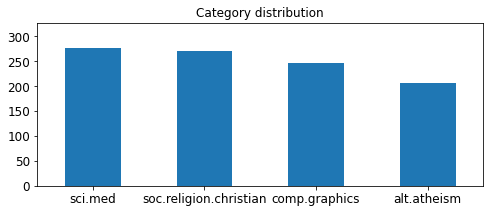

In [7]:
#Exercise 7
print("-" * 15, "Exercise 7", "-" * 15)

X_sample = X.sample(n=1000,random_state=42)
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

print("-" * 42)

--------------- Exercise 8 ---------------


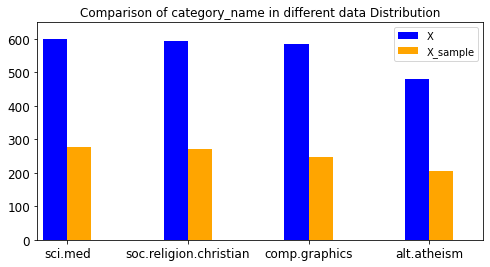

------------------------------------------


In [8]:
#Exercise 8
print("-" * 15, "Exercise 8", "-" * 15)

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 4)) ##定義圖片大小

# Plot for X
category_counts_X = X.category_name.value_counts() ##計算 X 數據中category_name中各類別的數量
upper_bound_X = max(category_counts_X) + 50
category_counts_X.plot(kind='bar', ax=ax, color='b', position=1, width=0.2, label='X', rot=0, fontsize=12) 

# Plot for X_sample
X_sample = X.sample(n=1000, random_state=42)
category_counts_X_sample = X_sample.category_name.value_counts() ##計算 X_sample 數據中category_name中各類別的數量
upper_bound_X_sample = max(category_counts_X_sample) + 50
category_counts_X_sample.plot(kind='bar', ax=ax, color='orange', position=0, width=0.2, label='X_sample', rot=0, fontsize=12)

ax.set_title('Comparison of category_name in different data Distribution', fontsize=12)
ax.set_ylim(0, max(upper_bound_X, upper_bound_X_sample)) ##去最大的值為上邊界
ax.legend()
plt.show()

print("-" * 42)

In [9]:
#Exercise 9
print("-" * 15, "Exercise 9", "-" * 15)

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
print(analyze(X.text[0]))

print("-" * 42)

--------------- Exercise 9 ---------------
['from', 'sd345', 'city', 'ac', 'uk', 'michael', 'collier', 'subject', 'converting', 'images', 'to', 'hp', 'laserjet', 'iii', 'nntp', 'posting', 'host', 'hampton', 'organization', 'the', 'city', 'university', 'lines', '14', 'does', 'anyone', 'know', 'of', 'good', 'way', 'standard', 'pc', 'application', 'pd', 'utility', 'to', 'convert', 'tif', 'img', 'tga', 'files', 'into', 'laserjet', 'iii', 'format', 'we', 'would', 'also', 'like', 'to', 'do', 'the', 'same', 'converting', 'to', 'hpgl', 'hp', 'plotter', 'files', 'please', 'email', 'any', 'response', 'is', 'this', 'the', 'correct', 'group', 'thanks', 'in', 'advance', 'michael', 'michael', 'collier', 'programmer', 'the', 'computer', 'unit', 'email', 'collier', 'uk', 'ac', 'city', 'the', 'city', 'university', 'tel', '071', '477', '8000', 'x3769', 'london', 'fax', '071', '477', '8565', 'ec1v', '0hb']
------------------------------------------


In [10]:
#Exercise 10
print("-" * 15, "Exercise 10", "-" * 15)

X_counts = count_vect.fit_transform(X.text)
X_counts_summary = sum(X_counts[0:5, 0:100].toarray()) ##計算每一行加總的數值
print(X_counts_summary) 
index = np.where(X_counts_summary > 0) ## 找出哪一行的 summary 大於 0 

print("\nAnswer：")
for i in range(len(index[0])): ##印出所有不為0的text
    print(count_vect.get_feature_names()[index[0][i]])


print("-" * 42)

--------------- Exercise 10 ---------------
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Answer：
00
01
------------------------------------------


--------------- Exercise 11 ---------------
(2257, 30)


,term_and,term_are,term_as,term_be,term_but,term_by,term_can,term_edu,term_for,term_from,...,term_that,term_the,term_there,term_this,term_to,term_was,term_we,term_what,term_with,term_you
doc_0,0,0,0,0,0,0,0,0,0,1,...,0,5,0,1,4,0,1,0,0,0
doc_1,0,0,1,4,0,1,2,1,2,1,...,0,11,1,3,4,0,0,0,0,0
doc_2,9,6,0,8,1,0,4,2,6,2,...,8,14,1,14,26,3,3,2,7,13
doc_3,1,0,0,0,0,0,1,0,1,1,...,0,6,0,1,0,0,0,0,0,0
doc_4,3,2,2,0,0,0,0,2,2,1,...,1,10,1,2,8,0,0,0,0,1
doc_5,7,3,3,12,0,1,0,2,0,1,...,10,12,0,2,14,0,0,1,0,0
doc_6,7,5,4,3,1,0,2,2,5,2,...,2,3,0,0,8,0,4,0,2,0
doc_7,9,3,4,5,4,0,1,0,1,4,...,11,21,1,2,11,3,1,0,5,0
doc_8,5,3,0,0,1,0,0,6,0,1,...,2,6,2,1,6,0,0,1,0,1
doc_9,23,0,3,1,3,0,0,2,3,1,...,18,10,2,7,21,16,0,4,9,5


------------------------------------------


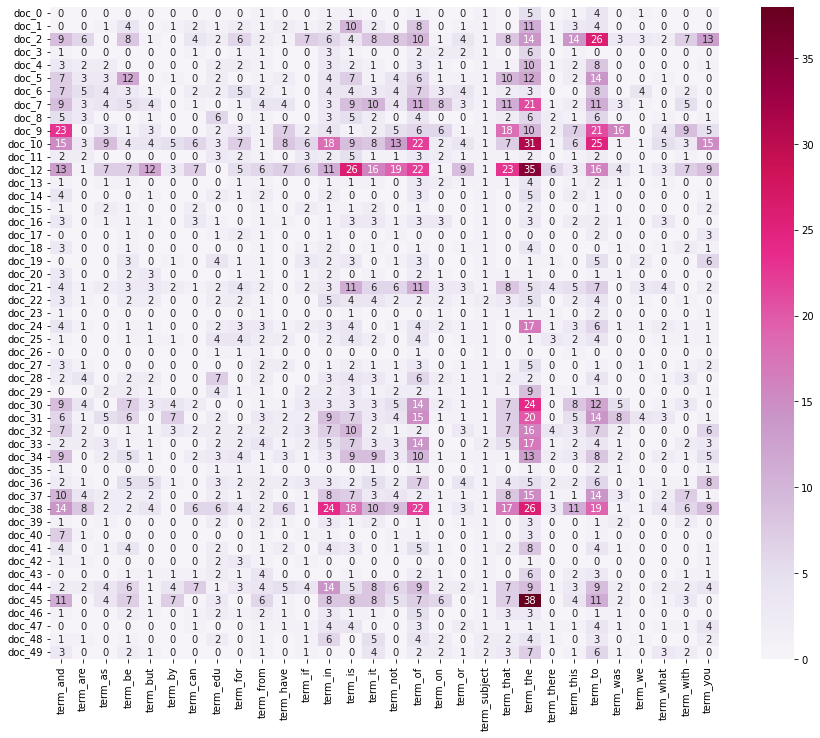

In [11]:
#Exercise 11
print("-" * 15, "Exercise 11", "-" * 15)

count_vect_exercise11 = CountVectorizer(max_features=30) ##抓出 feature 出現次數最多的前30個
X_counts_exercise11 = count_vect_exercise11.fit_transform(X.text) 
print(X_counts_exercise11.shape) ##印出大小會發現是一個只有30行的矩陣(列全數都有)

plot_x = ["term_"+str(i) for i in count_vect_exercise11.get_feature_names()] ##30個 features 全部使用
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]] ##抓50個 index 即可，這數字自行決定
plot_z = X_counts_exercise11[0:50 , :].toarray() 
max_value = np.max(plot_z) #去抓到最高的數字為多少，以利我們進行限制

import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(15, 12)) ##更改圖的大小，不然太擠了
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max_value, annot=True) ## vmax改為前面得到的最高值

print("-" * 42)

--------------- Exercise 12 ---------------
(2257, 3)


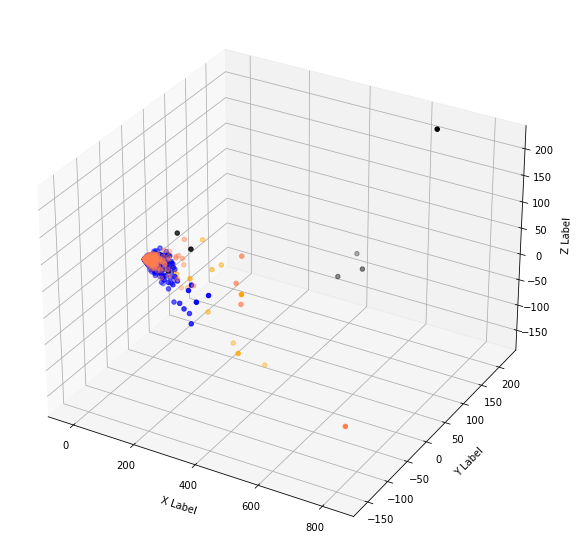

------------------------------------------


In [12]:
#Exercise 12
print("-" * 15, "Exercise 12", "-" * 15)

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D ##這個模組是用於創建3D圖形的
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray()) ##把 dimentions 減為3維
print(X_reduced.shape) ##印出 shape 確認

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

col = ['coral', 'blue', 'black', 'orange'] 
for c, category in zip(col, categories): ##每個categories用不同顏色畫，以做區分
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

print("-" * 42)

In [13]:
#Exercise 13
print("-" * 15, "Exercise 13", "-" * 15)

import plotly.express as px

term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

print("\n這種圖表優點是可以互動，將滑鼠指到你要看的數據，他就會顯示資訊!!\n")
term_frequencies_dict = {'Texts': count_vect.get_feature_names()[:300], 'counts': term_frequencies[:300]} ##用字典的方式記錄xy軸
df = pd.DataFrame(term_frequencies_dict) ##再轉成 dataframe 的形式

fig = px.bar(df, x='Texts', y='counts', title='Texts counts')
fig.update_xaxes(tickangle=90) ##選轉X軸上的標籤90度，以免相撞
fig.show()


print("-" * 42)

--------------- Exercise 13 ---------------
35788

這種圖表優點是可以互動，將滑鼠指到你要看的數據，他就會顯示資訊!!



------------------------------------------


In [14]:
#Exercise 14
print("-" * 15, "Exercise 14", "-" * 15)

top_indices = np.argsort(-term_frequencies)[:30]  # 從高到低取前30個索引
selected_texts = [count_vect.get_feature_names()[i] for i in np.sort(top_indices)]  # 根據索引取得詞彙(我這邊使用的是原始index的排序!!)
selected_counts = term_frequencies[np.sort(top_indices)]  # 根據索引取得對應的次數

print(top_indices) ##這是前30個高值得Index!!
print(np.sort(top_indices)) ##將這些index照原始順序排列

term_frequencies_dict = {'Texts': selected_texts, 'counts': selected_counts}
df = pd.DataFrame(term_frequencies_dict)

fig = px.bar(df, x='Texts', y='counts', title='Texts counts')
fig.update_xaxes(tickangle=90)
fig.show()

print("-" * 42)

--------------- Exercise 14 ---------------
[32142 23610 32493  4992 18474 17556 32139 18551 35638 14601 23250 32270
  6298 14887  5410 12626 16254  5549 23733 35157  7480 23870 17268 34703
  7766 34775 32202  7505 34923 31077]
[ 4992  5410  5549  6298  7480  7505  7766 12626 14601 14887 16254 17268
 17556 18474 18551 23250 23610 23733 23870 31077 32139 32142 32202 32270
 32493 34703 34775 34923 35157 35638]


------------------------------------------


In [15]:
#Exercise 15
print("-" * 15, "Exercise 15", "-" * 15)

top_indices = np.argsort(-term_frequencies)[:300]  # 從高到低取前300個索引
selected_texts = [count_vect.get_feature_names()[i] for i in top_indices]  # 根據索引取得詞彙
selected_counts = term_frequencies[top_indices]  # 根據索引取得對應的次數

term_frequencies_dict = {'Texts': selected_texts, 'counts': selected_counts}
df = pd.DataFrame(term_frequencies_dict)

fig = px.bar(df, x='Texts', y='counts', title='long tail')
fig.update_xaxes(tickangle=90)
fig.show()

print("-" * 42)

--------------- Exercise 15 ---------------


------------------------------------------


In [16]:
#Exercise 16
print("-" * 15, "Exercise 16", "-" * 15)

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

mlb.fit(X.category_name) ##在 category_name 再做一次，並確認能不能實現
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
print(X[0:9])

print("\nAnswer:")
print("可以使用在category_name上!")

print("-" * 42)

--------------- Exercise 16 ---------------
                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category bin_category_name  
0           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 

# Second Part：

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. The Data

In [96]:
import pandas as pd
import os

data = []
folder_names = ["amazon_cells_labelled", "imdb_labelled", "yelp_labelled"] ##我需要開啟的檔案名

for folder in folder_names:
    path = 'C:/NTHU/data mining/DM2023-Lab1-Master/Homework/sentiment_labelled_sentences/'+ str(folder) +'.txt' ##新增檔案絕對路徑
    if folder == 'imdb_labelled':
        ##默認情況下，pandas會嘗試使用C解析器來處理數據，但在某些情況下，C解析器可能無法處理某些特殊的數據。在這種情況下，使用Python解析器可能更適合。因此，如果你遇到了一些解析錯誤或問題，你可以將engine參數設置為'python'
        df = pd.read_csv(path, sep='  \t', engine='python', header=None, names=['text', 'score']) ##不設置這行，有些資料會讀漏
        df['category'] = 1
        df['category_name'] = 'imdb.com' ##如果 data 來自此檔案，就為他新增一個類別 imdb.com
        data.append(df)
    else:
        df = pd.read_csv(path, sep='\t', header=None, names=['text', 'score']) ##利用 \t 分隔資料為 text 跟 score
        if folder == "amazon_cells_labelled": ##如果 data 來自此檔案，就為他新增一個類別 amazon.com
            df['category'] = 0
            df['category_name'] = 'amazon.com'
        else:                                 ##如果 data 來自此檔案，就為他新增一個類別 yelp.com
            df['category'] = 2
            df['category_name'] = 'yelp.com'  
        data.append(df)                       ##每個資料框 df 添加到 data 中
    

data = pd.concat(data, ignore_index=True) ##將 data 中的所有資料框組合為一個大的 DataFrame

data = data.sample(frac=1, random_state=42) ##打亂 data

In [97]:
data[0:10]

,text,score,category,category_name
1801,Avoid at ALL costs!,0,1,imdb.com
1190,"Garbo, who showed right off the bat that her t...",1,1,imdb.com
1817,You will leave the theater wanting to go out a...,1,1,imdb.com
251,O my gosh the best phone I have ever had.,1,0,amazon.com
2505,I would not recommend this place.,0,2,yelp.com
1117,Then scene where they debated whether or not t...,0,1,imdb.com
1411,Her role was played well.,1,1,imdb.com
2113,"Nice, spicy and tender.",1,2,yelp.com
408,Plantronics Bluetooth Excelent Buy.,1,0,amazon.com
2579,"As for the service: I'm a fan, because it's qu...",1,2,yelp.com


## 3. Data Transformation

In [98]:
len(data)

3000

In [99]:
data[0:2]

,text,score,category,category_name
1801,Avoid at ALL costs!,0,1,imdb.com
1190,"Garbo, who showed right off the bat that her t...",1,1,imdb.com


In [100]:
for t in data["text"][:3]:
    print(t)

Avoid at ALL costs!
Garbo, who showed right off the bat that her talents could carry over from the silent era (I wanted to see some of her silent work, but Netflix doesn't seem to be stocking them.
You will leave the theater wanting to go out and dance under the stars.


In [101]:
data[0:10]

,text,score,category,category_name
1801,Avoid at ALL costs!,0,1,imdb.com
1190,"Garbo, who showed right off the bat that her t...",1,1,imdb.com
1817,You will leave the theater wanting to go out a...,1,1,imdb.com
251,O my gosh the best phone I have ever had.,1,0,amazon.com
2505,I would not recommend this place.,0,2,yelp.com
1117,Then scene where they debated whether or not t...,0,1,imdb.com
1411,Her role was played well.,1,1,imdb.com
2113,"Nice, spicy and tender.",1,2,yelp.com
408,Plantronics Bluetooth Excelent Buy.,1,0,amazon.com
2579,"As for the service: I'm a fan, because it's qu...",1,2,yelp.com


In [102]:
data[:10][["text","category_name"]]

,text,category_name
1801,Avoid at ALL costs!,imdb.com
1190,"Garbo, who showed right off the bat that her t...",imdb.com
1817,You will leave the theater wanting to go out a...,imdb.com
251,O my gosh the best phone I have ever had.,amazon.com
2505,I would not recommend this place.,yelp.com
1117,Then scene where they debated whether or not t...,imdb.com
1411,Her role was played well.,imdb.com
2113,"Nice, spicy and tender.",yelp.com
408,Plantronics Bluetooth Excelent Buy.,amazon.com
2579,"As for the service: I'm a fan, because it's qu...",yelp.com


In [103]:
data[-10:]

,text,score,category,category_name
1482,I loved this movie it was a great portrayal of...,1,1,imdb.com
330,VERY comfortable.,1,0,amazon.com
1238,The poor actors.,0,1,imdb.com
466,No buyers remorse on this one!.,0,0,amazon.com
2169,Bacon is hella salty.,1,2,yelp.com
1638,I have to say that this film was excellently p...,1,1,imdb.com
1095,MANNA FROM HEAVEN is a terrific film that is b...,1,1,imdb.com
1130,There was NO chemistry between Ben Affleck and...,0,1,imdb.com
1294,"He is one of my favourite directors, and one o...",1,1,imdb.com
860,Last time buying from you.,0,0,amazon.com


In [104]:
data.loc[:10, 'text']

1801                                  Avoid at ALL costs!
1190    Garbo, who showed right off the bat that her t...
1817    You will leave the theater wanting to go out a...
251             O my gosh the best phone I have ever had.
2505                    I would not recommend this place.
                              ...                        
2058    The salad had just the right amount of sauce t...
22               The commercials are the most misleading.
711     It lasts less than 3o minutes, if I actually t...
2949    Maybe it's just their Vegetarian fare, but I'v...
10                        And the sound quality is great.
Name: text, Length: 2051, dtype: object

In [105]:
data.iloc[:10, 0]

1801                                  Avoid at ALL costs!
1190    Garbo, who showed right off the bat that her t...
1817    You will leave the theater wanting to go out a...
251             O my gosh the best phone I have ever had.
2505                    I would not recommend this place.
1117    Then scene where they debated whether or not t...
1411                            Her role was played well.
2113                              Nice, spicy and tender.
408                   Plantronics Bluetooth Excelent Buy.
2579    As for the service: I'm a fan, because it's qu...
Name: text, dtype: object

In [106]:
selected_category = data[data['category_name'] == 'imdb.com'] ##去尋找category_name叫做imdb.com的資料
print(selected_category.iloc[:10]) ##並印出前10個

print("*" * 42)
grouped_data = data.groupby('category_name').size() ##去統計每個category_name類別的個數，是一個非常方便的函式
print(grouped_data) ##並印出統計數量結果

                                                   text  score  category  \
1801                                Avoid at ALL costs!      0         1   
1190  Garbo, who showed right off the bat that her t...      1         1   
1817  You will leave the theater wanting to go out a...      1         1   
1117  Then scene where they debated whether or not t...      0         1   
1411                          Her role was played well.      1         1   
1763  I liked the way Dustin Hoffman's character was...      1         1   
1073       There are some generally great things in it.      1         1   
1360  This is one of the best movies out there that ...      1         1   
1226  He can bore you to pieces, and kill the moment...      0         1   
1241  This would not even be good as a made for TV f...      0         1   

     category_name  
1801      imdb.com  
1190      imdb.com  
1817      imdb.com  
1117      imdb.com  
1411      imdb.com  
1763      imdb.com  
1073      imdb.c

In [107]:
data[data['category_name'] == 'imdb.com'].iloc[::10][0:5]

,text,score,category,category_name
1801,Avoid at ALL costs!,0,1,imdb.com
1005,"The rest of the movie lacks art, charm, meanin...",0,1,imdb.com
1270,"It is an excellent drama, an excellent thrille...",1,1,imdb.com
1269,"The attention given to every character, and co...",1,1,imdb.com
1770,"An Italian reviewer called this ""a small, grea...",1,1,imdb.com


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [108]:
# check missing values
data.isnull()

,text,score,category,category_name
1801,False,False,False,False
1190,False,False,False,False
1817,False,False,False,False
251,False,False,False,False
2505,False,False,False,False
...,...,...,...,...
1638,False,False,False,False
1095,False,False,False,False
1130,False,False,False,False
1294,False,False,False,False


In [109]:
import helpers.data_mining_helpers as dmh
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [110]:
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

1801    (The amoung of missing records is: , 0)
1190    (The amoung of missing records is: , 0)
1817    (The amoung of missing records is: , 0)
251     (The amoung of missing records is: , 0)
2505    (The amoung of missing records is: , 0)
                         ...                   
1638    (The amoung of missing records is: , 0)
1095    (The amoung of missing records is: , 0)
1130    (The amoung of missing records is: , 0)
1294    (The amoung of missing records is: , 0)
860     (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [111]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "score"])
dummy_series

text     dummy_record
score               1
dtype: object

In [112]:
dummy_series.to_frame().T

,text,score
0,dummy_record,1


In [113]:
result_with_series = pd.concat([data, dummy_series.to_frame().T], ignore_index=True)
# check if the records was commited into result
len(result_with_series)

3001

In [114]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [115]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'score': 1
              }]
data = pd.concat([data, pd.DataFrame(dummy_dict)], ignore_index=True)
len(data)

3001

In [116]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [117]:
data.dropna(inplace=True)
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [118]:
len(data)

3000

In [119]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print(NA_df['missing_example'].isnull())
print("\nAnswer:")
print("是由於 DataFrame 中的 missing_example 列包含了不同的缺失值表示形式，這些形式可能不被 isnull() 識別為缺失值")

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Answer:
是由於 DataFrame 中的 missing_example 列包含了不同的缺失值表示形式，這些形式可能不被 isnull() 識別為缺失值


### 4.2 Dealing with Duplicate Data

In [120]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [121]:
sum(data.duplicated())

17

In [122]:
sum(data.duplicated('text'))

18

In [123]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'score': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'score': 1, 
                             'category_name': "dummy category"
                        }]

data = pd.concat([data, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

print(len(data))

sum(data.duplicated())

3002


18

In [124]:
data.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

len(data)

2966

## 5.  Data Preprocessing

### 5.1 Sampling

In [125]:
print(data.shape)
data_sample = data.sample(n=1000,random_state=42) #random state
display(data_sample)

(2966, 4)


,text,score,category,category_name
2421,How can that be?The audio quality is poor.,0,0.0,amazon.com
806,But this understated film leaves a lasting imp...,1,1.0,imdb.com
1918,Very much disappointed with this company.,0,0.0,amazon.com
337,"Much more interesting, more action, more suspe...",1,1.0,imdb.com
2048,"It lasts less than 3o minutes, if I actually t...",0,0.0,amazon.com
...,...,...,...,...
2464,But this movie really got to me.,1,1.0,imdb.com
281,I cannot make calls at certain places.,0,0.0,amazon.com
1698,"Totally different, with loads of understatemen...",1,1.0,imdb.com
1674,Watching washing machine twirling around would...,0,1.0,imdb.com


In [126]:
len(data_sample)

1000

In [127]:
data_sample[0:4]

,text,score,category,category_name
2421,How can that be?The audio quality is poor.,0,0.0,amazon.com
806,But this understated film leaves a lasting imp...,1,1.0,imdb.com
1918,Very much disappointed with this company.,0,0.0,amazon.com
337,"Much more interesting, more action, more suspe...",1,1.0,imdb.com


In [128]:
data_sample_1 = data.sample(n=5,random_state=42) #random state
display(data_sample_1)

data_sample_2 = data.sample(n=5,random_state=42) #random state
display(data_sample_2)

data_sample_3 = data.sample(n=5,random_state=58) #random state
display(data_sample_3)

print("\nAnswer:")
print("可以看到我隨意採樣的三筆資料，差別只有在random_state而已，如果設置一樣的話，每次得到的數據就會相同，而第三組設置的數字不同，自然也得到不同的答案")

,text,score,category,category_name
2421,How can that be?The audio quality is poor.,0,0.0,amazon.com
806,But this understated film leaves a lasting imp...,1,1.0,imdb.com
1918,Very much disappointed with this company.,0,0.0,amazon.com
337,"Much more interesting, more action, more suspe...",1,1.0,imdb.com
2048,"It lasts less than 3o minutes, if I actually t...",0,0.0,amazon.com


,text,score,category,category_name
2421,How can that be?The audio quality is poor.,0,0.0,amazon.com
806,But this understated film leaves a lasting imp...,1,1.0,imdb.com
1918,Very much disappointed with this company.,0,0.0,amazon.com
337,"Much more interesting, more action, more suspe...",1,1.0,imdb.com
2048,"It lasts less than 3o minutes, if I actually t...",0,0.0,amazon.com


,text,score,category,category_name
1682,the spaghetti is nothing special whatsoever.,0,2.0,yelp.com
225,Nice solid keyboard.,1,0.0,amazon.com
499,"When I opened the sandwich, I was impressed, b...",0,2.0,yelp.com
381,The service here leaves a lot to be desired.,0,2.0,yelp.com
2510,The phone loads super!,1,0.0,amazon.com



Answer:
可以看到我隨意採樣的三筆資料，差別只有在random_state而已，如果設置一樣的話，每次得到的數據就會相同，而第三組設置的數字不同，自然也得到不同的答案


imdb.com      994
yelp.com      992
amazon.com    980
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

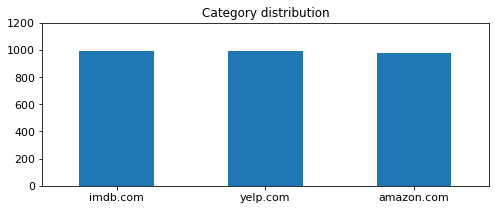

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

print(data.category_name.value_counts())

# plot barchart for X
data.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1200],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

yelp.com      351
imdb.com      332
amazon.com    317
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

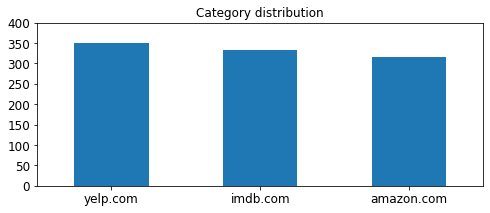

In [130]:
print(data_sample.category_name.value_counts())

# plot barchart for X_sample
data_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 400], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

351
yelp.com      351
imdb.com      332
amazon.com    317
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

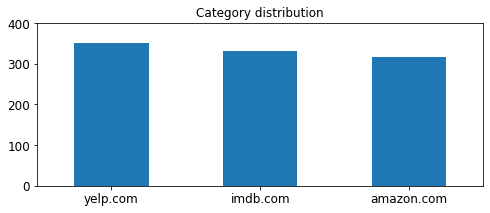

In [131]:
print(max(data_sample.category_name.value_counts()))
upper_bound = max(data_sample.category_name.value_counts() + 50) 
print(data_sample.category_name.value_counts())

data_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

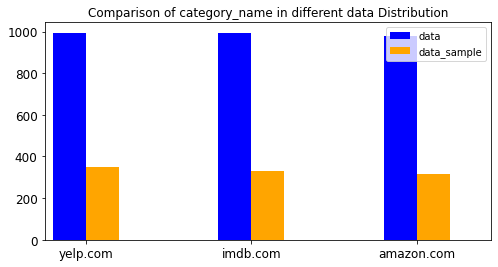

In [132]:
fig, ax = plt.subplots(figsize=(8, 4)) ##定義圖片大小

# Plot for data
category_counts_data = data.category_name.value_counts() ##計算 data 數據中category_name中各類別的數量
upper_bound_data = max(category_counts_data) + 50
category_counts_data.plot(kind='bar', ax=ax, color='b', position=1, width=0.2, label='data', rot=0, fontsize=12) 

# Plot for data_sample
data_sample = data.sample(n=1000, random_state=42)
category_counts_data_sample = data_sample.category_name.value_counts() ##計算 data_sample 數據中category_name中各類別的數量
upper_bound_data_sample = max(category_counts_data_sample) + 50
category_counts_data_sample.plot(kind='bar', ax=ax, color='orange', position=0, width=0.2, label='data_sample', rot=0, fontsize=12)

ax.set_title('Comparison of category_name in different data Distribution', fontsize=12)
ax.set_ylim(0, max(upper_bound_data, upper_bound_data_sample)) ##去最大的值為上邊界
ax.legend()
plt.show()

### 5.2 Feature Creation

In [133]:
import nltk
nltk.download('punkt')

data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))

data[0:4]["unigrams"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nick2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                           [Avoid, at, ALL, costs, !]
1    [Garbo, ,, who, showed, right, off, the, bat, ...
2    [You, will, leave, the, theater, wanting, to, ...
3    [O, my, gosh, the, best, phone, I, have, ever,...
Name: unigrams, dtype: object

In [134]:
data[0:4]

,text,score,category,category_name,unigrams
0,Avoid at ALL costs!,0,1.0,imdb.com,"[Avoid, at, ALL, costs, !]"
1,"Garbo, who showed right off the bat that her t...",1,1.0,imdb.com,"[Garbo, ,, who, showed, right, off, the, bat, ..."
2,You will leave the theater wanting to go out a...,1,1.0,imdb.com,"[You, will, leave, the, theater, wanting, to, ..."
3,O my gosh the best phone I have ever had.,1,0.0,amazon.com,"[O, my, gosh, the, best, phone, I, have, ever,..."


In [135]:
list(data[0:1]['unigrams'])

[['Avoid', 'at', 'ALL', 'costs', '!']]

### 5.3 Feature subset selection

In [185]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text) #learn the vocabulary and return document-term matrix
print(data_counts.shape)
print(data_counts[0])

(2966, 5153)
  (0, 345)	1
  (0, 314)	1
  (0, 179)	1
  (0, 1035)	1


In [186]:
count_vect.get_feature_names()[2431]

'it'

In [187]:
count_vect.get_feature_names()[859]

'close'

In [188]:
count_vect.get_feature_names()[4607]

'to'

In [189]:
count_vect.get_feature_names()[2981]

'my'

In [190]:
analyze = count_vect.build_analyzer()
analyze(data.text[0])

['avoid', 'at', 'all', 'costs']

In [191]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [192]:
print(analyze(data.text[0]))

['avoid', 'at', 'all', 'costs']


In [193]:
analyze(" ".join(list(data[:1].text)))

['avoid', 'at', 'all', 'costs']

In [146]:
data_counts.shape

(2966, 5153)

In [147]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [148]:
data_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [150]:
count_vect.get_feature_names()[0:1]

['00']

In [151]:
data_counts_summary = sum(data_counts[0:5, 0:200].toarray()) ##計算每一行加總的數值
print(data_counts_summary) 
index = np.where(data_counts_summary > 0) ## 找出哪一行的 summary 大於 0 

print("\nAnswer：")
for i in range(len(index[0])): ##印出所有不為0的text
    print(count_vect.get_feature_names()[index[0][i]])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Answer：
accused
all


In [152]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
print(plot_x)

plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
print(plot_y)

plot_z = data_counts[0:20, 0:20].toarray() #data_counts[how many documents, how many terms]
print(plot_z)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


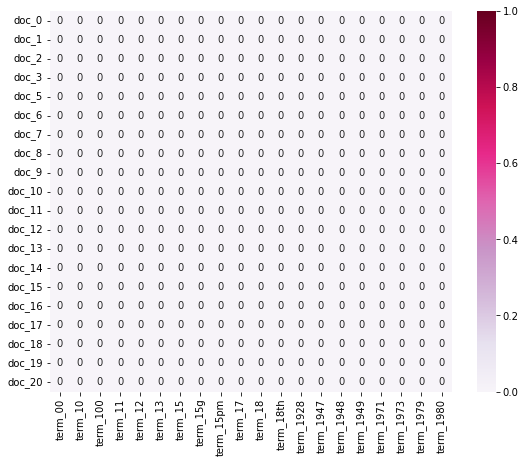

In [153]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

(2966, 20)


,term_and,term_but,term_for,term_good,term_great,term_in,term_is,term_it,term_my,term_not,term_of,term_on,term_that,term_the,term_this,term_to,term_very,term_was,term_with,term_you
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,1,0,0,0,0,0,0,0,0,1,0,1,2,0,2,0,0,0,0
doc_2,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1
doc_3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
doc_5,0,0,1,0,0,0,1,0,0,1,0,0,0,2,0,1,0,1,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
doc_7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
doc_10,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0


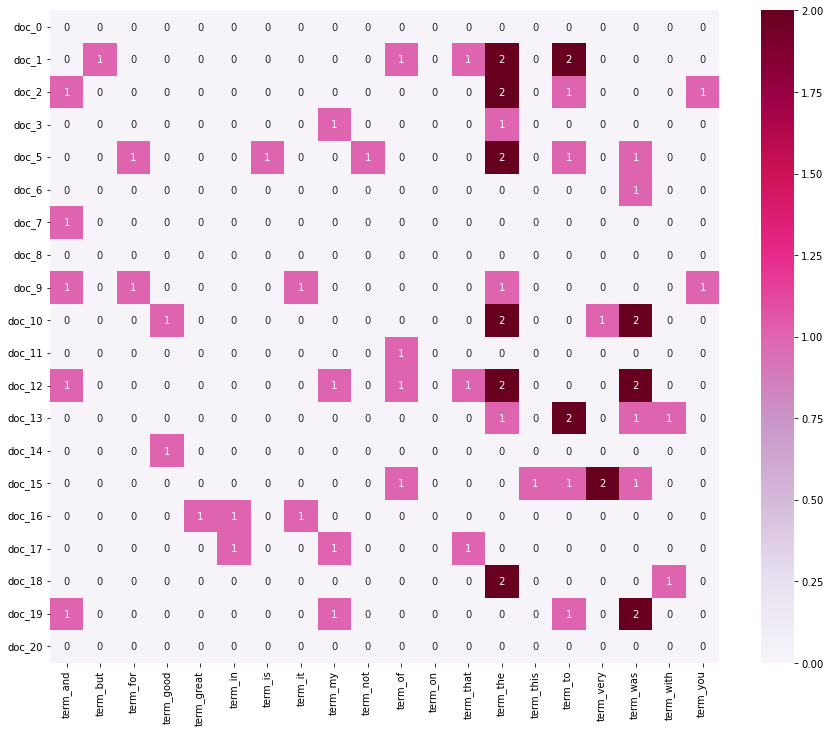

In [154]:
count_vect_30 = CountVectorizer(max_features=20) ##抓出 feature 出現次數最多的前30個
data_counts_30 = count_vect_30.fit_transform(data.text) 
print(data_counts_30.shape) ##印出大小會發現是一個只有30行的矩陣(列全數都有)

plot_x = ["term_"+str(i) for i in count_vect_30.get_feature_names()] ##30個 features 全部使用
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]] ##抓50個 index 即可，這數字自行決定
plot_z = data_counts_30[0:20 , :].toarray() 
max_value = np.max(plot_z) #去抓到最高的數字為多少，以利我們進行限制

import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(15, 12)) ##更改圖的大小，不然太擠了
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max_value, annot=True) ## vmax改為前面得到的最高值

### 5.4 Dimensionality Reduction

In [155]:
from sklearn.decomposition import PCA

print(data_counts.shape)
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
print(data_reduced.shape)

(2966, 5153)
(2966, 2)


In [156]:
data_reduced.shape

(2966, 2)

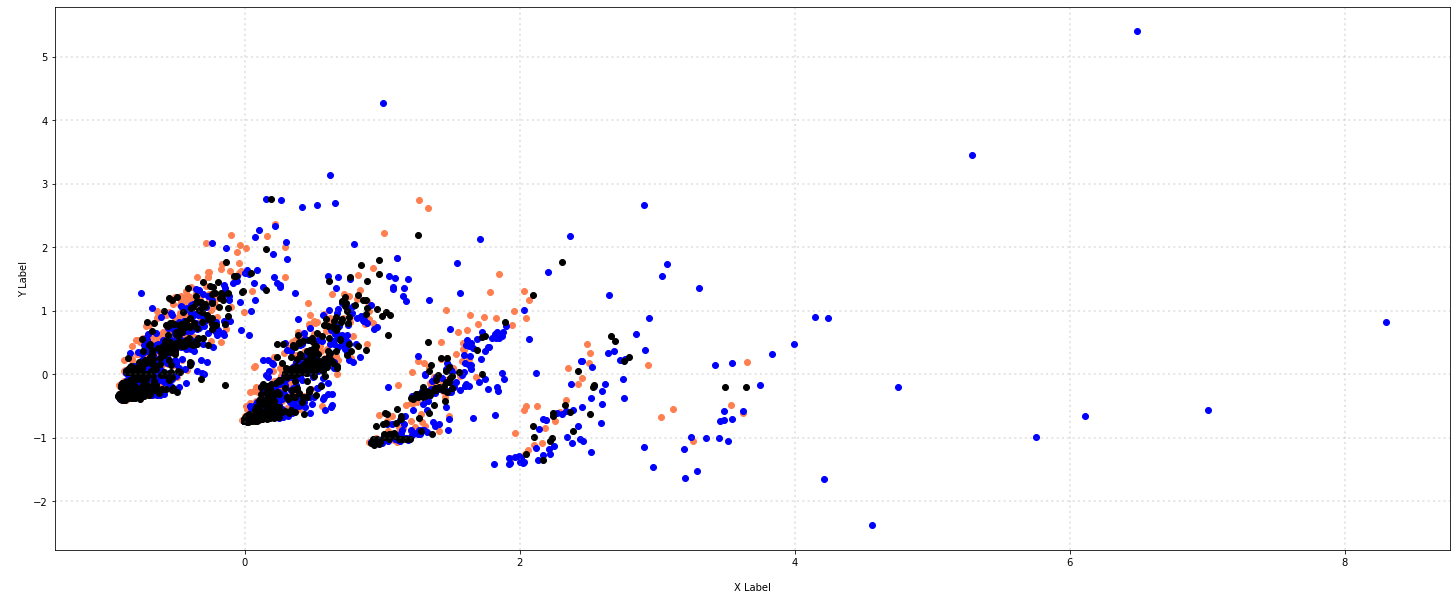

In [159]:
col = ['coral', 'blue', 'black']
categories = ["amazon.com", "imdb.com", "yelp.com"]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = data_reduced[data['category_name'] == category].T[0]
    ys = data_reduced[data['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

(2966, 3)


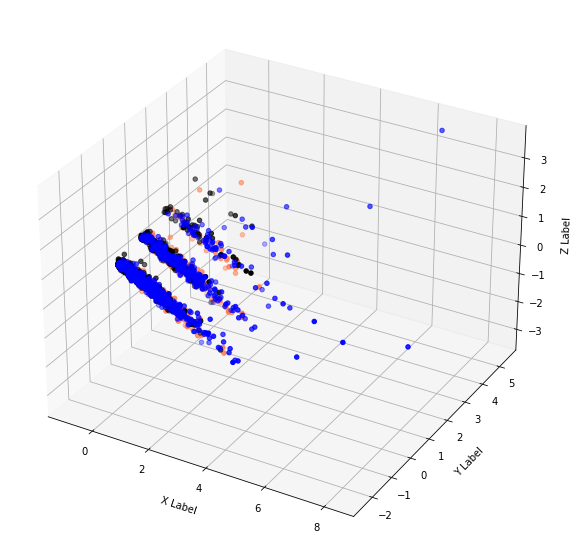

In [162]:
from mpl_toolkits.mplot3d import Axes3D ##這個模組是用於創建3D圖形的
data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray()) ##把 dimentions 減為3維
print(data_reduced.shape) ##印出 shape 確認

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

col = ['coral', 'blue', 'black'] 
for c, category in zip(col, categories): ##每個categories用不同顏色畫，以做區分
    xs = data_reduced[data['category_name'] == category].T[0]
    ys = data_reduced[data['category_name'] == category].T[1]
    zs = data_reduced[data['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### 5.5 Attribute Transformation / Aggregation

In [163]:
term_frequencies = []
print(data_counts.shape[1])
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

5153


In [164]:
import numpy as np
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

term_frequencies[0] #sum of first term: 00

1

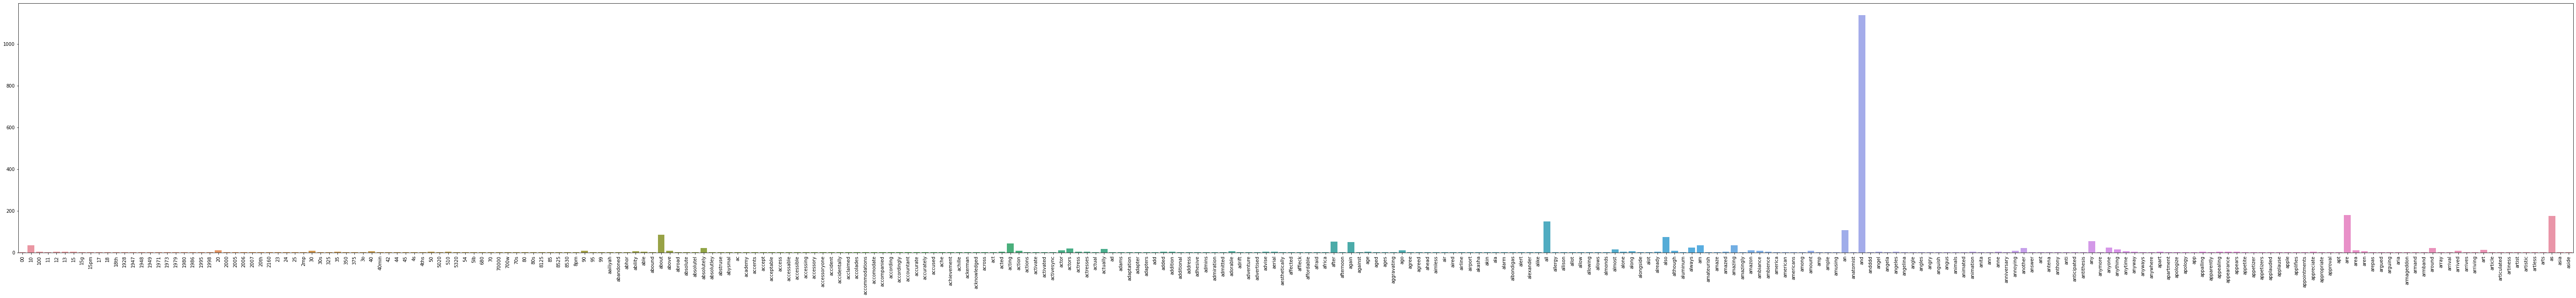

In [165]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [166]:
import plotly.express as px

term_frequencies = []
print(data_counts.shape[1])
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

print("\n這種圖表優點是可以互動，將滑鼠指到你要看的數據，他就會顯示資訊!!\n")
term_frequencies_dict = {'Texts': count_vect.get_feature_names()[:300], 'counts': term_frequencies[:300]} ##用字典的方式記錄xy軸
df = pd.DataFrame(term_frequencies_dict) ##再轉成 dataframe 的形式

fig = px.bar(df, x='Texts', y='counts', title='Texts counts')
fig.update_xaxes(tickangle=90) ##選轉X軸上的標籤90度，以免相撞
fig.show()

5153

這種圖表優點是可以互動，將滑鼠指到你要看的數據，他就會顯示資訊!!



In [167]:
top_indices = np.argsort(-term_frequencies)[:30]  # 從高到低取前30個索引
selected_texts = [count_vect.get_feature_names()[i] for i in np.sort(top_indices)]  # 根據索引取得詞彙(我這邊使用的是原始index的排序!!)
selected_counts = term_frequencies[np.sort(top_indices)]  # 根據索引取得對應的次數

print(top_indices) ##這是前30個高值得Index!!
print(np.sort(top_indices)) ##將這些index照原始順序排列

term_frequencies_dict = {'Texts': selected_texts, 'counts': selected_counts}
df = pd.DataFrame(term_frequencies_dict)

fig = px.bar(df, x='Texts', y='counts', title='Texts counts')
fig.update_xaxes(tickangle=90)
fig.show()

[4529  216 2431 2426 4607 4556 3096 4966 2313 1828 4527 3062 5067 2981
 4888 1992 3121 5136  637 2022 2112 2953  273  297 4159 1741 3320  179
  416 3123]
[ 179  216  273  297  416  637 1741 1828 1992 2022 2112 2313 2426 2431
 2953 2981 3062 3096 3121 3123 3320 4159 4527 4529 4556 4607 4888 4966
 5067 5136]


In [168]:
top_indices = np.argsort(-term_frequencies)[:300]  # 從高到低取前300個索引
selected_texts = [count_vect.get_feature_names()[i] for i in top_indices]  # 根據索引取得詞彙
selected_counts = term_frequencies[top_indices]  # 根據索引取得對應的次數

term_frequencies_dict = {'Texts': selected_texts, 'counts': selected_counts}
df = pd.DataFrame(term_frequencies_dict)

fig = px.bar(df, x='Texts', y='counts', title='long tail')
fig.update_xaxes(tickangle=90)
fig.show()

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


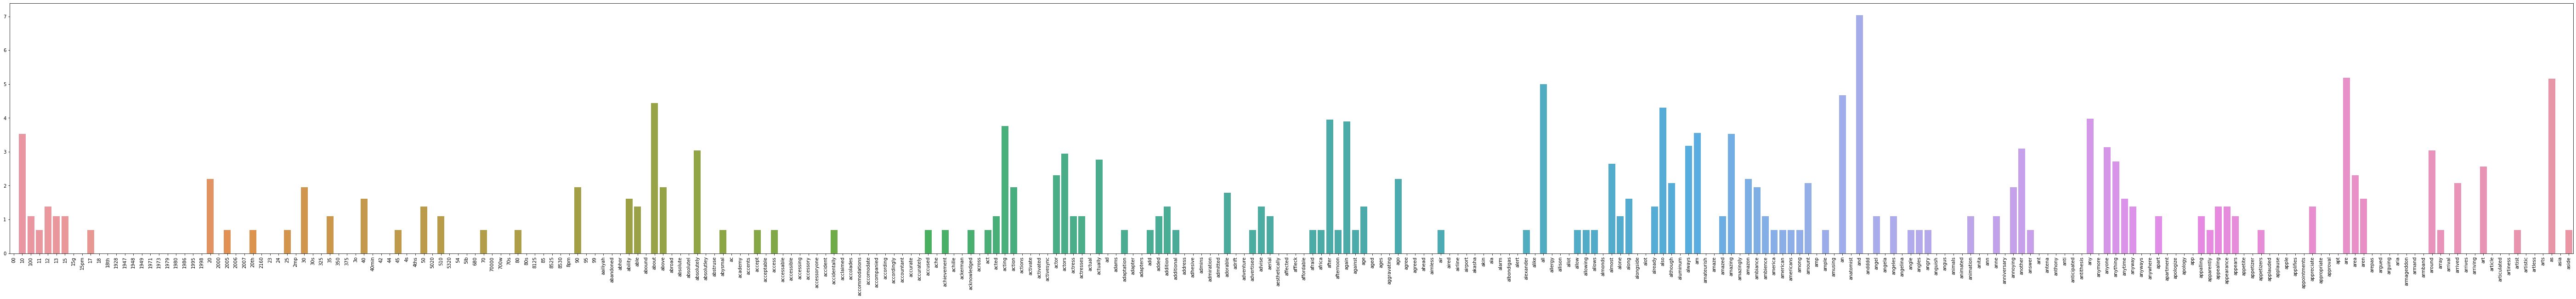

In [169]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90)

### 5.6 Discretization and Binarization

In [170]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.category)

LabelBinarizer()

In [171]:
data['bin_category'] = mlb.transform(data['category']).tolist()

In [172]:
data[0:9]

,text,score,category,category_name,unigrams,bin_category
0,Avoid at ALL costs!,0,1.0,imdb.com,"[Avoid, at, ALL, costs, !]","[0, 1, 0]"
1,"Garbo, who showed right off the bat that her t...",1,1.0,imdb.com,"[Garbo, ,, who, showed, right, off, the, bat, ...","[0, 1, 0]"
2,You will leave the theater wanting to go out a...,1,1.0,imdb.com,"[You, will, leave, the, theater, wanting, to, ...","[0, 1, 0]"
3,O my gosh the best phone I have ever had.,1,0.0,amazon.com,"[O, my, gosh, the, best, phone, I, have, ever,...","[1, 0, 0]"
5,Then scene where they debated whether or not t...,0,1.0,imdb.com,"[Then, scene, where, they, debated, whether, o...","[0, 1, 0]"
6,Her role was played well.,1,1.0,imdb.com,"[Her, role, was, played, well, .]","[0, 1, 0]"
7,"Nice, spicy and tender.",1,2.0,yelp.com,"[Nice, ,, spicy, and, tender, .]","[0, 0, 1]"
8,Plantronics Bluetooth Excelent Buy.,1,0.0,amazon.com,"[Plantronics, Bluetooth, Excelent, Buy, .]","[1, 0, 0]"
9,"As for the service: I'm a fan, because it's qu...",1,2.0,yelp.com,"[As, for, the, service, :, I, 'm, a, fan, ,, b...","[0, 0, 1]"


In [173]:
data['bin_category'] = mlb.transform(data['category']).tolist()

mlb.fit(data.category_name) ##在 category_name 再做一次，並確認能不能實現
data['bin_category_name'] = mlb.transform(data['category_name']).tolist()
print(data[0:9])

print("\nAnswer:")
print("可以使用在category_name上!")

                                                text  score  category  \
0                                Avoid at ALL costs!      0       1.0   
1  Garbo, who showed right off the bat that her t...      1       1.0   
2  You will leave the theater wanting to go out a...      1       1.0   
3          O my gosh the best phone I have ever had.      1       0.0   
5  Then scene where they debated whether or not t...      0       1.0   
6                          Her role was played well.      1       1.0   
7                            Nice, spicy and tender.      1       2.0   
8                Plantronics Bluetooth Excelent Buy.      1       0.0   
9  As for the service: I'm a fan, because it's qu...      1       2.0   

  category_name                                           unigrams  \
0      imdb.com                         [Avoid, at, ALL, costs, !]   
1      imdb.com  [Garbo, ,, who, showed, right, off, the, bat, ...   
2      imdb.com  [You, will, leave, the, theater, wanting, 

## 6. Data Exploration

In [174]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [175]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['The best electronics of the available FM Transmitters.']
['Easy to pair with my Samsung Cell.']
['It fits so securely that the ear hook does not even need to be used and the sound is better directed through your ear canal.']


In [176]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [177]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.234888
Cosine Similarity using count bw 2 and 3: 0.070186
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Third Part：

## 3-1 New Data Visualization :

利用 WordCloud 類生成詞雲圖，其中指定了圖像的寬度、高度和背景顏色等參數。

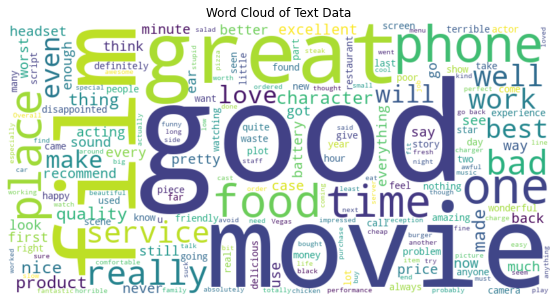

In [178]:
from wordcloud import WordCloud

text_combined = ' '.join(data['text'].tolist()) ##將所有的 text 串再一起方便統計

##使用 generate 將 text_combined 中的單詞頻率轉換為一個圖像
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined) ##創造一個 WordCloud 的物件
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


可以更進一步的將 WordCloud 拆成正面跟負面的族群，可以拿來進一步的分析

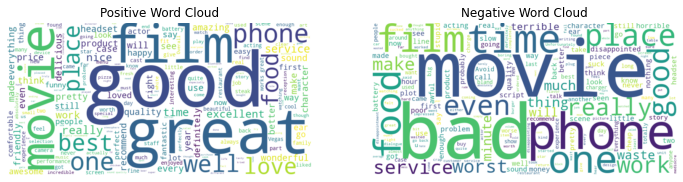

In [179]:
# 創建正面詞彙的詞雲
positive_text_combined = ' '.join(data[data['score'] == 1]['text'].tolist())
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text_combined)

# 創建負面詞彙的詞雲
negative_text_combined = ' '.join(data[data['score'] == 0]['text'].tolist())
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text_combined)

# 繪製詞雲
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].set_title('Positive Word Cloud')
axes[0].axis('off')

axes[1].imshow(negative_wordcloud, interpolation='bilinear')
axes[1].set_title('Negative Word Cloud')
axes[1].axis('off')

plt.show()

還有一個想法是，我去分析每一個不同來源的數據正負評之間的差距，不過出來的結看起來是都各一半，並無明顯的落差

[486, 496, 498]


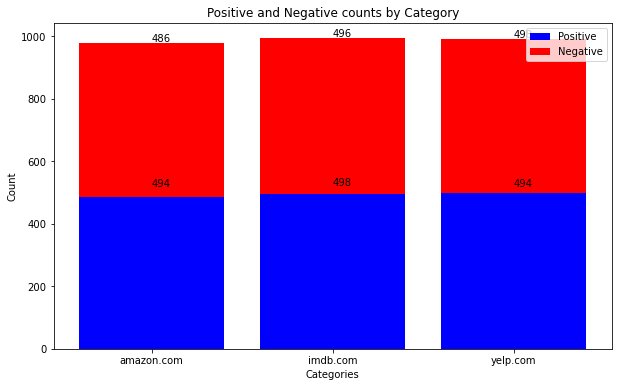

In [180]:
# 計算每個類別的正評和負評的數量
positive_counts = []
negative_counts = []

for i in range(3):
    pos_count = data[(data['category'] == i) & (data['score'] == 1)].shape[0]
    neg_count = data[(data['category'] == i) & (data['score'] == 0)].shape[0]
    positive_counts.append(pos_count) ##記錄正評論的數量 3
    negative_counts.append(neg_count) ##記錄正評論的數量 3

# 繪製堆積條形圖
categories = ['amazon.com', 'imdb.com', 'yelp.com']
bar_width = 0.8
index = np.arange(len(categories)) ## 會輸出 [0, 1, 2] 可用來下方設定數量
print(positive_counts)
plt.figure(figsize=(10, 6))
p1 = plt.bar(index, positive_counts, bar_width, color='b', label='Positive')
p2 = plt.bar(index, negative_counts, bar_width, color='r', bottom=positive_counts, label='Negative')

# 在條形上方顯示數量
for i, (p, q) in enumerate(zip(positive_counts, negative_counts)): ##在特定位置印上正負評論的數量
    plt.text(i, p+q+5, str(p), color='black')
    plt.text(i, q+25, str(q), color='black')

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Positive and Negative counts by Category')
plt.xticks(index, categories)
plt.legend()
plt.show()

## 3-2 TF-IDF features :

分別用了兩種方式來表達 TFIDF，下方註解有詳細解釋

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 創建 TfidfVectorizer 對象
tfidf_vectorizer = TfidfVectorizer()

##將 text 作為輸入，並計算 TFIDF 
tfidf_matrix = tfidf_vectorizer.fit_transform(data.text)

##計算每一列的 text 的 TFIDF (column 為所有 words)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())
print(tfidf_df)

##計算每個單字的TFIDF值，並用 dataframe 形式畫出
tfidf_df = {'word':tfidf_vectorizer.get_feature_names(), 'tfidf':tfidf_matrix.toarray().sum(axis=0).tolist()}
tfidf_df = pd.DataFrame(tfidf_df)
tfidf_df.sort_values(by='tfidf', ascending=False)
print(tfidf_df)


       00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2961  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2962  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2963  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2964  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2965  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  


## 3-3 Naive Bayes classifier :

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

# 將數據集分為訓練集和測試集
x = data['text']
y = data['score']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

##TF-IDF features
# 創建TF-IDF和單詞計數特徵
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 創建Naive Bayes分類器
clf_tfidf = MultinomialNB()

# 將 輸入 輸出填入訓練
clf_tfidf.fit(X_train_tfidf, y_train)
y_pred = clf_tfidf.predict(X_test_tfidf)

# 進行測試並打印結果
print("TF-IDF Features Classifier Score:", clf_tfidf.score(X_test_tfidf, y_test))
print(classification_report(y_test, y_pred))

##word frequency features
# 創建TF-IDF和單詞計數特徵
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# 創建Naive Bayes分類器
clf_counts = MultinomialNB()

# 將 輸入 輸出填入訓練
clf_counts.fit(X_train_counts, y_train)

y_pred = clf_counts.predict(X_test_counts)

# 進行測試並打印結果
print("Word Frequency Features Classifier Score:", clf_counts.score(X_test_counts, y_test))
print(classification_report(y_test, y_pred))

TF-IDF Features Classifier Score: 0.8146067415730337
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       459
           1       0.82      0.79      0.80       431

    accuracy                           0.81       890
   macro avg       0.82      0.81      0.81       890
weighted avg       0.81      0.81      0.81       890

Word Frequency Features Classifier Score: 0.8123595505617978
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       459
           1       0.82      0.79      0.80       431

    accuracy                           0.81       890
   macro avg       0.81      0.81      0.81       890
weighted avg       0.81      0.81      0.81       890



# Forth Part：

1. 在畫 heatmap 的時候，我們是直接取前 20 個 features ，但這樣也能從結果發現效果並不理想，因為幾乎都是0 整個很稀疏，但我們可以去選擇出現次數最多的幾個來作圖，如下方所示。

(2966, 30)


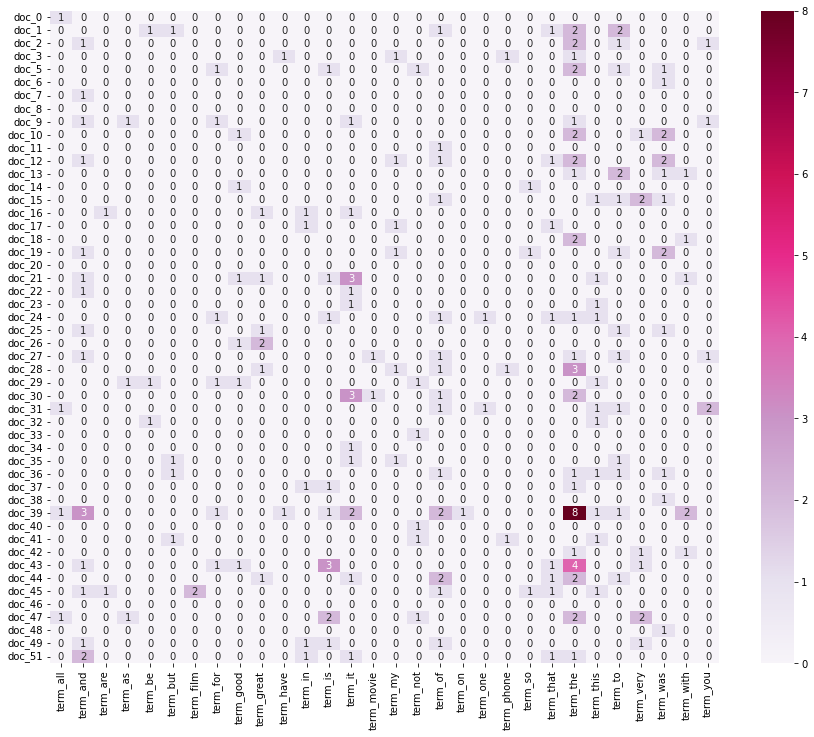

In [183]:
count_vect_30 = CountVectorizer(max_features=30) ##抓出 feature 出現次數最多的前30個
data_counts_30 = count_vect_30.fit_transform(data.text) 
print(data_counts_30.shape) ##印出大小會發現是一個只有30行的矩陣(列全數都有)

plot_x = ["term_"+str(i) for i in count_vect_30.get_feature_names()] ##30個 features 全部使用
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:50]] ##抓50個 index 即可，這數字自行決定
plot_z = data_counts_30[0:50 , :].toarray() 
max_value = np.max(plot_z) #去抓到最高的數字為多少，以利我們進行限制

import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 12)) ##更改圖的大小，不然太擠了
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max_value, annot=True) ## vmax改為前面得到的最高值

2. 在計算每個 text 有多少數量時，我們是將它全部畫出，但就是視覺上來說，我們比較關注的應該只有出現次數比較多的 text , 所以我下方選出了出現次數最高的 30 個 text 來作圖 ， 並使用 plotly 套件來讓圖可互動，能了解到更多資訊。 

In [184]:
import plotly.express as px

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
top_indices = np.argsort(-term_frequencies)[:30]  # 從高到低取前30個索引
selected_texts = [count_vect.get_feature_names()[i] for i in np.sort(top_indices)]  # 根據索引取得詞彙(我這邊使用的是原始index的排序!!)
selected_counts = term_frequencies[np.sort(top_indices)]  # 根據索引取得對應的次數

print(top_indices) ##這是前30個高值得Index!!
print(np.sort(top_indices)) ##將這些index照原始順序排列

term_frequencies_dict = {'Texts': selected_texts, 'counts': selected_counts}
df = pd.DataFrame(term_frequencies_dict)

fig = px.bar(df, x='Texts', y='counts', title='Texts counts')
fig.update_xaxes(tickangle=90)
fig.show()

[4529  216 2431 2426 4607 4556 3096 4966 2313 1828 4527 3062 5067 2981
 4888 1992 3121 5136  637 2022 2112 2953  273  297 4159 1741 3320  179
  416 3123]
[ 179  216  273  297  416  637 1741 1828 1992 2022 2112 2313 2426 2431
 2953 2981 3062 3096 3121 3123 3320 4159 4527 4529 4556 4607 4888 4966
 5067 5136]


3. 在這次的 LAB 中，我覺得最常出現的就是 Sparse 的問題，很常畫圖出來的結果都是非常稀疏的，但其實我們可以取前面較為重要的一些 features 來視覺化即可。

4. 或是在做 PCA 時，因為一次刪掉了太多的 dimensions ，導致我們很難去分析剩下的資料，所以我們必須特別注意這個問題。

5. 在 data['text'] 中我們能進行更多的處理，像是老師上課所說到的，我們有像是 part-of-speech tagging 以及 stemming 之類的前處理程序來讓我們之後的分析更具意義，更能透過 bag of words 掃出適合的單字，而不是像現在一個一個做切割。

# Fifth Part：

我已將註解寫在每一個 cell 中，感謝助教